In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

PATH = os.getcwd()
for _ in range(2):
    PATH = os.path.dirname(PATH)
if PATH not in sys.path:
    sys.path.append(PATH)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from FactorAnalysis.week2.helpers.data_preprocessing import pop_OHLCV
from FactorAnalysis.week1.helpers.data_processing import read_from_db, read_table_names
from FactorAnalysis.week2.helpers.information_analysis import factor_analysis_all

In [4]:
sns.set_theme()
warnings.filterwarnings("ignore")

## Load Factors and Prices

In [5]:
start_date = "20190101"
db_factors = "data/factors.db"
db_factors_raw = "../week1/data/factors.db"

factors_raw = read_from_db("factors_all_stocks", db_factors_raw)
factors = read_from_db("factors_all_stocks", db_factors)

ohlcv, _ = pop_OHLCV(factors_raw, start_date=start_date)
ohlcv

open   high    low  close        vol
trade_date ts_code                                         
2019-01-02 000001.SZ   9.39   9.42   9.16   9.19  539386.32
           000002.SZ  23.83  24.09  23.67  23.90  247010.28
           000006.SZ   5.18   5.25   5.10   5.15   63229.64
           000008.SZ   3.89   3.91   3.81   3.88   98226.46
           000009.SZ   4.35   4.41   4.26   4.30  101892.01
...                     ...    ...    ...    ...        ...
2023-12-29 688777.SH  45.30  45.72  45.05  45.35   82515.09
           688778.SH  40.64  40.82  39.50  39.64   17730.41
           688779.SH   7.35   7.41   7.28   7.30  156277.64
           688819.SH  28.00  28.25  27.83  27.92   26407.92
           688981.SH  53.00  53.50  52.88  53.02  126486.66

[1398271 rows x 5 columns]

In [6]:
factors

total_mv        pe        pb  turnover_rate  \
trade_date ts_code                                                  
2019-01-02 000001.SZ  0.083321 -0.325763 -0.798117      -0.304775   
           000002.SZ  0.083321 -0.206204 -0.480028      -0.135223   
           000006.SZ  0.702998  0.950617  0.348110       0.968434   
           000008.SZ  0.581733  2.102146  1.447103       1.740295   
           000009.SZ -1.733993 -1.530981 -0.199528      -0.993448   
...                        ...       ...       ...            ...   
2023-12-29 688777.SH -0.222965 -0.200384 -0.401124      -0.377340   
           688778.SH -0.771222 -0.461310 -0.824449      -0.793190   
           688779.SH -2.473606 -1.008549 -0.815579      -2.495824   
           688819.SH -0.702957 -0.805802 -0.532022      -0.969003   
           688981.SH -0.288936 -0.496714 -0.855544      -0.488154   

                      reversal_rate  volatility       roe  netprofit_yoy  \
trade_date ts_code                                                         
2019-01-02 000001.SZ      -0.220369   -0.228010 -0.114297      -0.176164   
           000002.SZ      -0.212351   -0.267856  0.082697      -0.013247   
           000006.SZ       0.935827    0.895779  0.971955       0.924936   
           000008.SZ       1.717541    1.623287  1.257846       1.665371   
           000009.SZ      -1.231527   -1.224059 -1.038154      -1.369969   
...                             ...         ...       ...            ...   
2023-12-29 688777.SH      -0.401381   -0.601752 -0.462780      -0.513021   
           688778.SH      -1.053647   -0.790082 -0.731853      -0.252151   
           688779.SH      -2.495088   -2.391307 -1.870585      -1.014213   
           688819.SH      -0.932444   -0.917142 -1.146047      -1.004502   
           688981.SH      -0.389428   -0.677466 -0.352826      -0.234297   

                        or_yoy  assets_yoy  equity_yoy  gross_profit_margin  \
trade_date ts_code                                                            
2019-01-02 000001.SZ -0.229718   -0.195412   -0.480238            -0.452793   
           000002.SZ -0.157485    0.395986   -0.234699             0.000424   
           000006.SZ  1.020208    0.952265    0.835304             0.935789   
           000008.SZ  1.823129    1.882059    1.221329             0.970596   
           000009.SZ -1.496202   -1.467010   -0.804477            -1.445616   
...                        ...         ...         ...                  ...   
2023-12-29 688777.SH -0.516439   -0.453111   -0.517085            -0.501424   
           688778.SH -0.394839   -0.397358   -0.006730            -0.377000   
           688779.SH -1.034186   -1.091583   -1.868308            -1.058373   
           688819.SH -1.003178   -1.048111   -0.887566            -1.157365   
           688981.SH -0.401160   -0.479728   -0.506171            -0.393868   

                      operating_profit_margin  net_profit_margin  \
trade_date ts_code                                                 
2019-01-02 000001.SZ                -0.459658          -0.418976   
           000002.SZ                -0.013598          -0.093235   
           000006.SZ                 0.927483           0.917090   
           000008.SZ                 0.962309           0.960389   
           000009.SZ                -1.485266          -0.988157   
...                                       ...                ...   
2023-12-29 688777.SH                -0.498649          -0.493062   
           688778.SH                -0.384726          -0.243073   
           688779.SH                -1.072313          -1.065926   
           688819.SH                -1.153338          -1.143297   
           688981.SH                -0.391102          -0.382208   

                      operating_cash_flow_to_net_income  \
trade_date ts_code                                        
2019-01-02 000001.SZ                          -0.339621   
           000002.SZ                         

## Information Analysis

  0%|                                                                                                                                                                 | 0/2 [00:00<?, ?it/s]

Factor total_mv
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
IC plots:


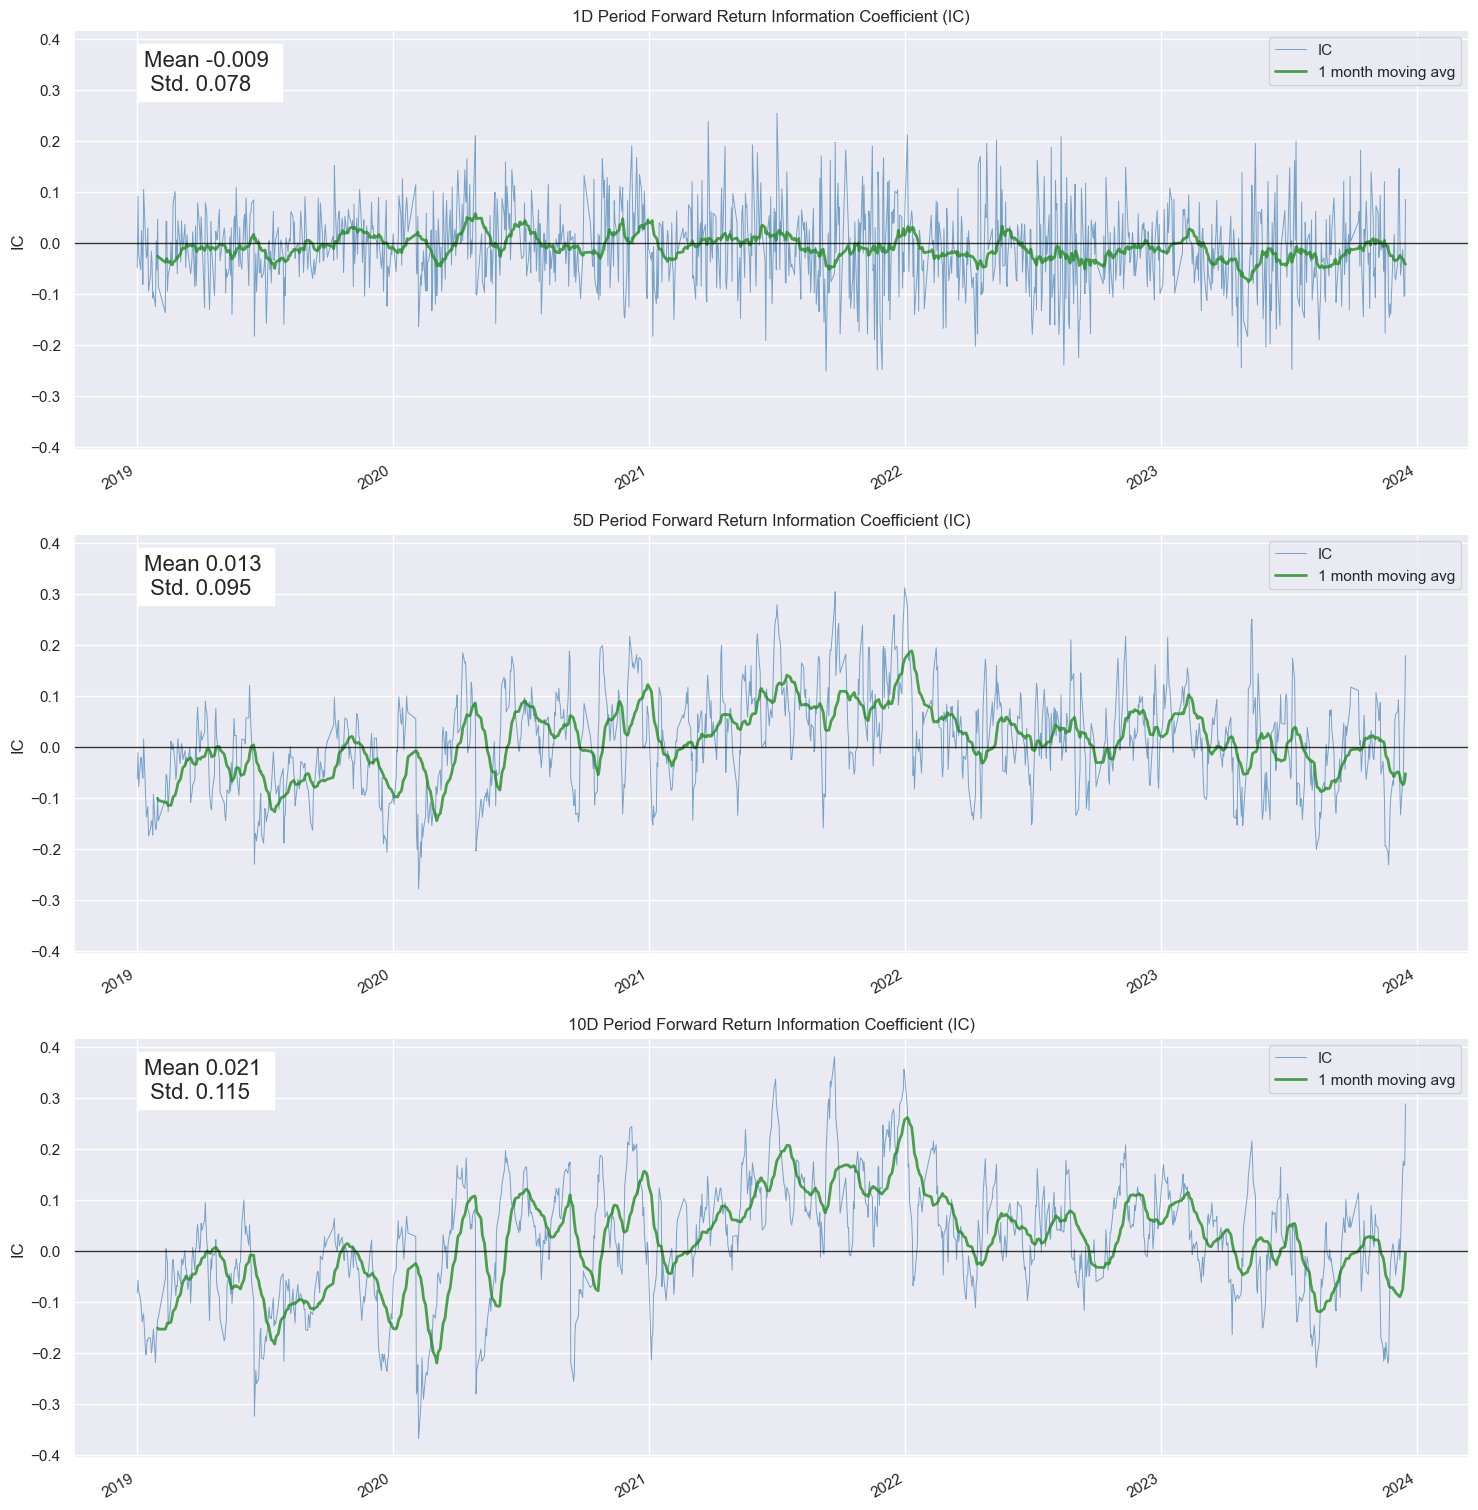

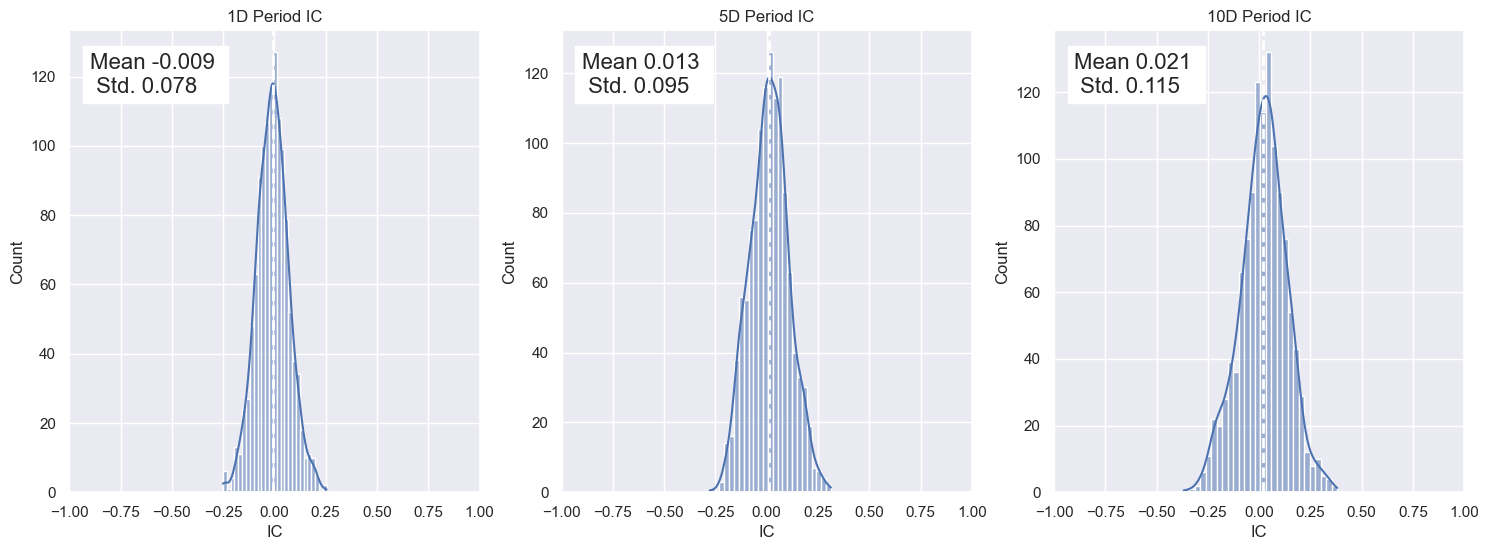

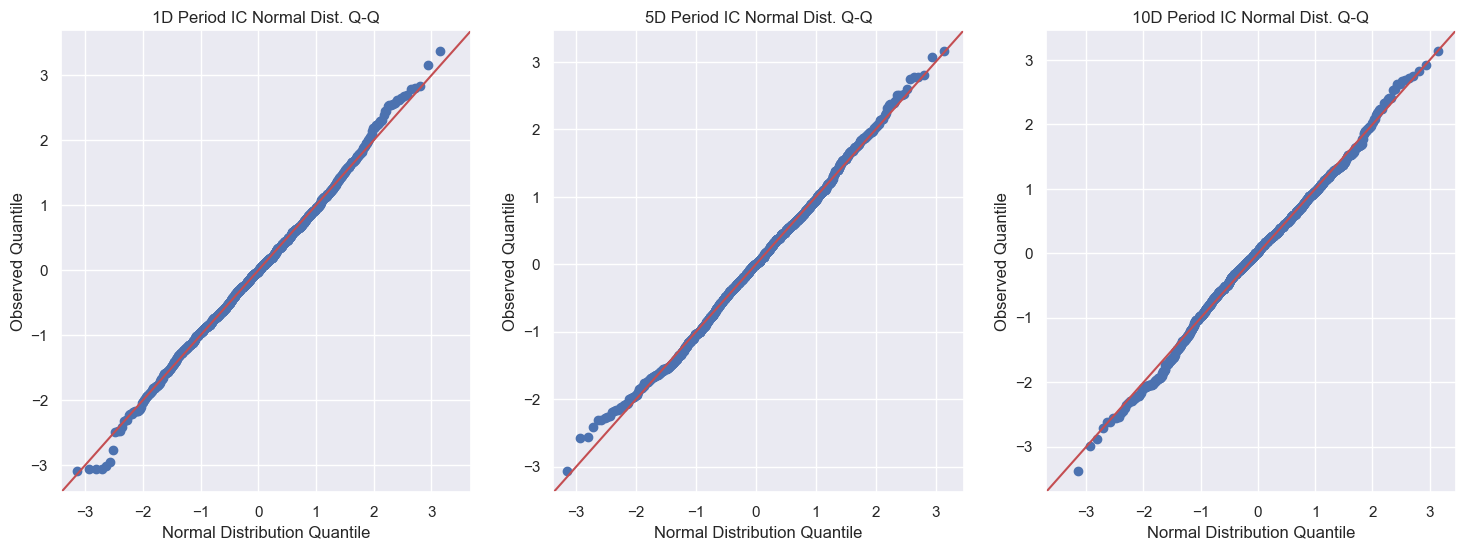

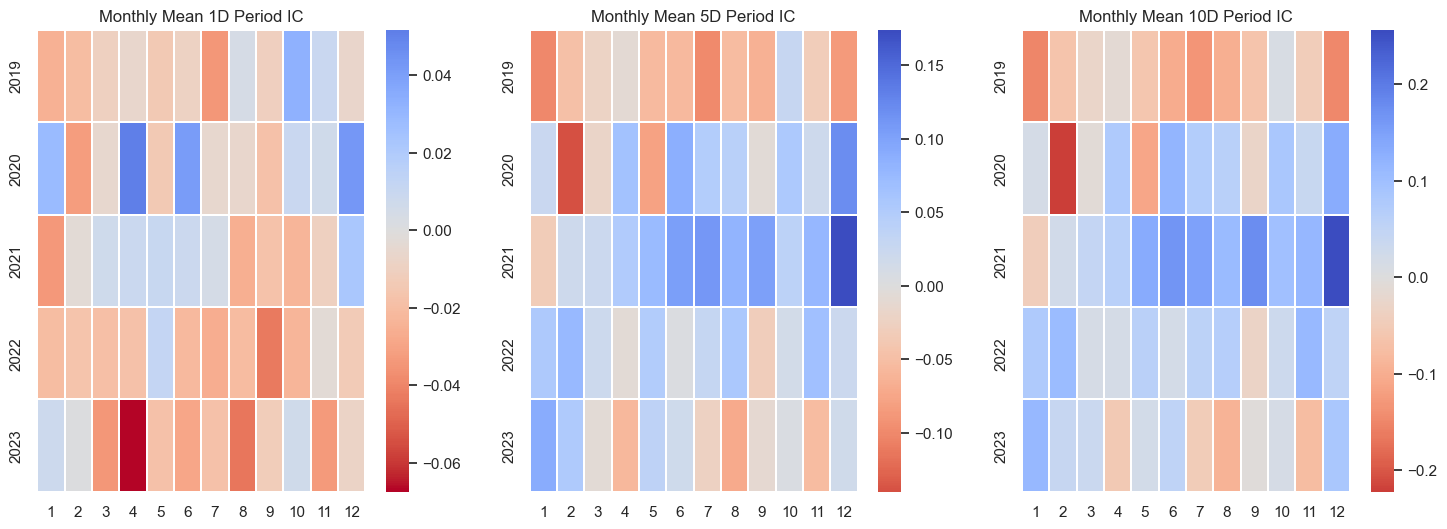

----------------------------------------------------------------------------------------------------
Rank IC plots:


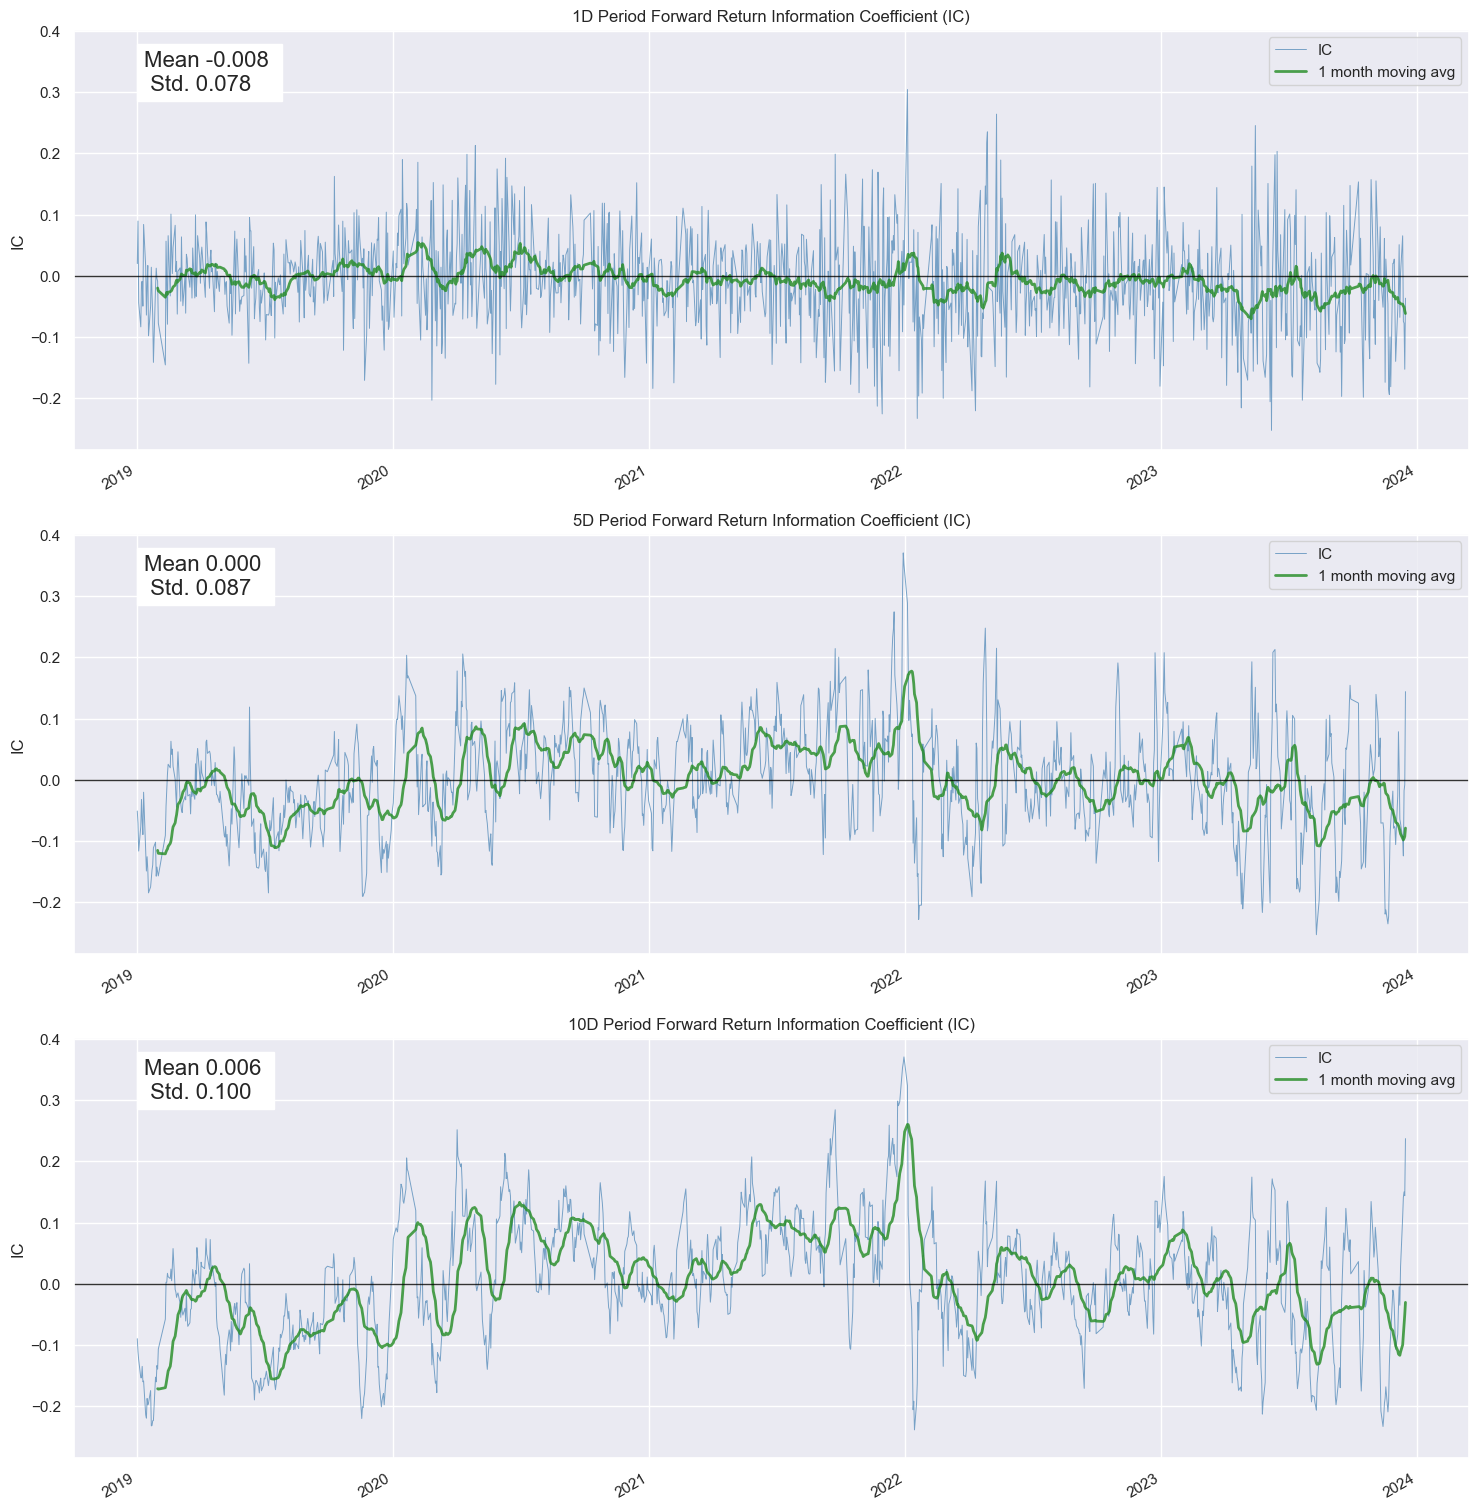

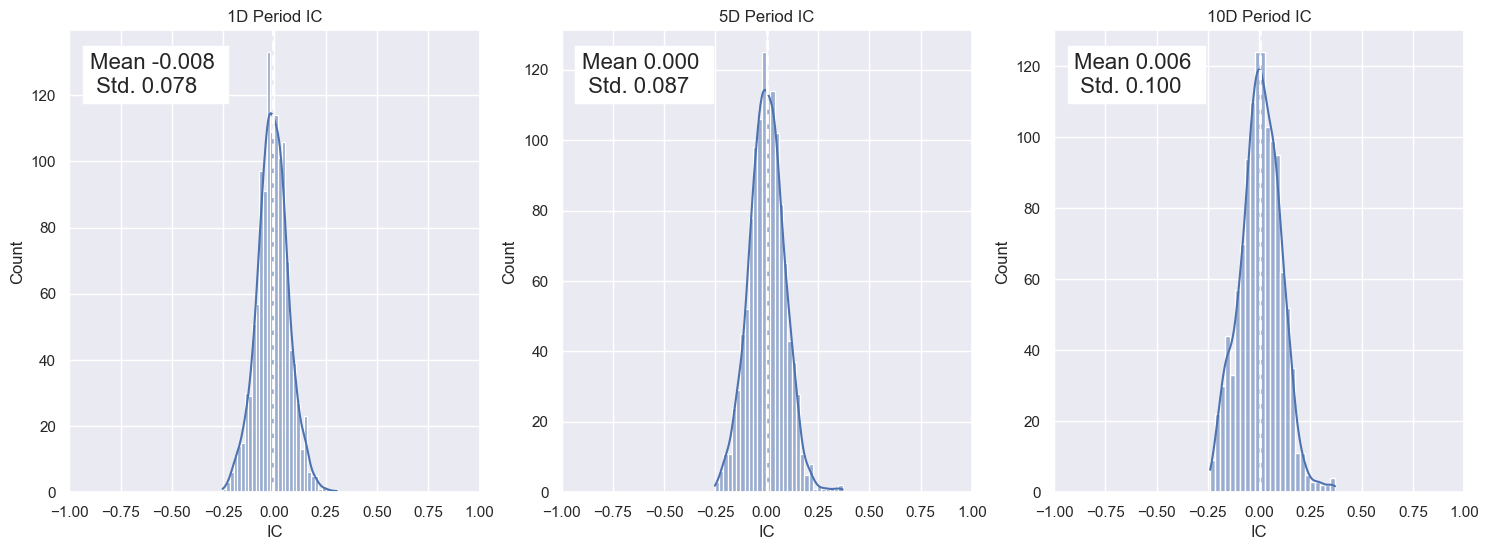

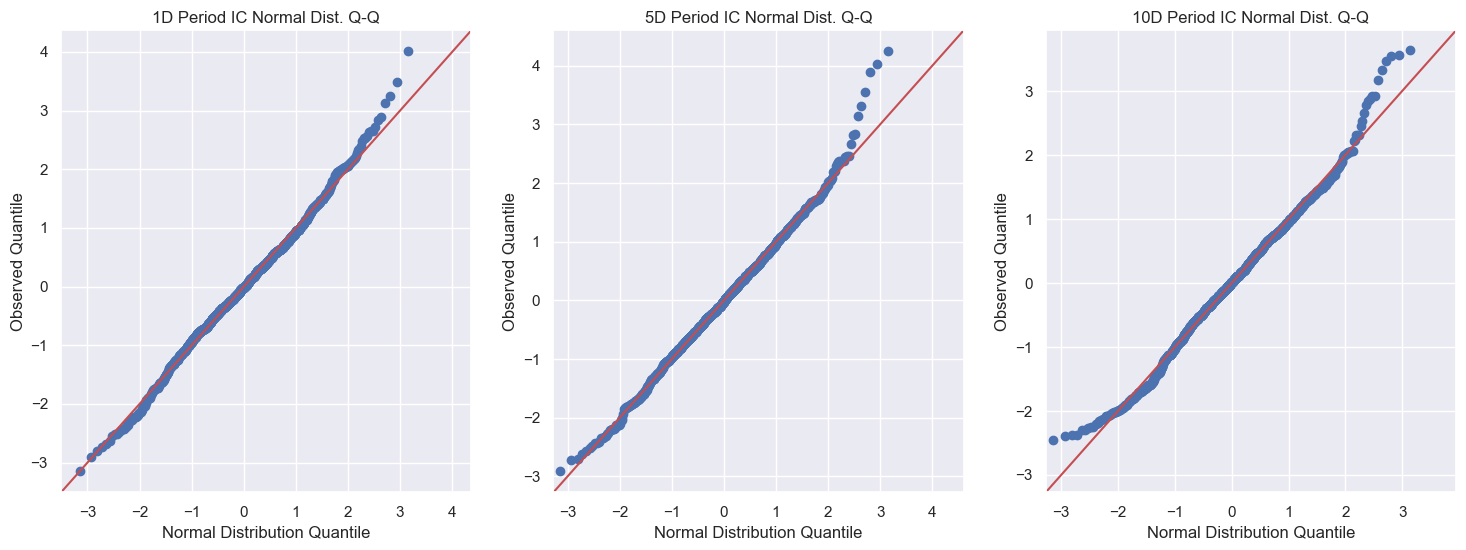

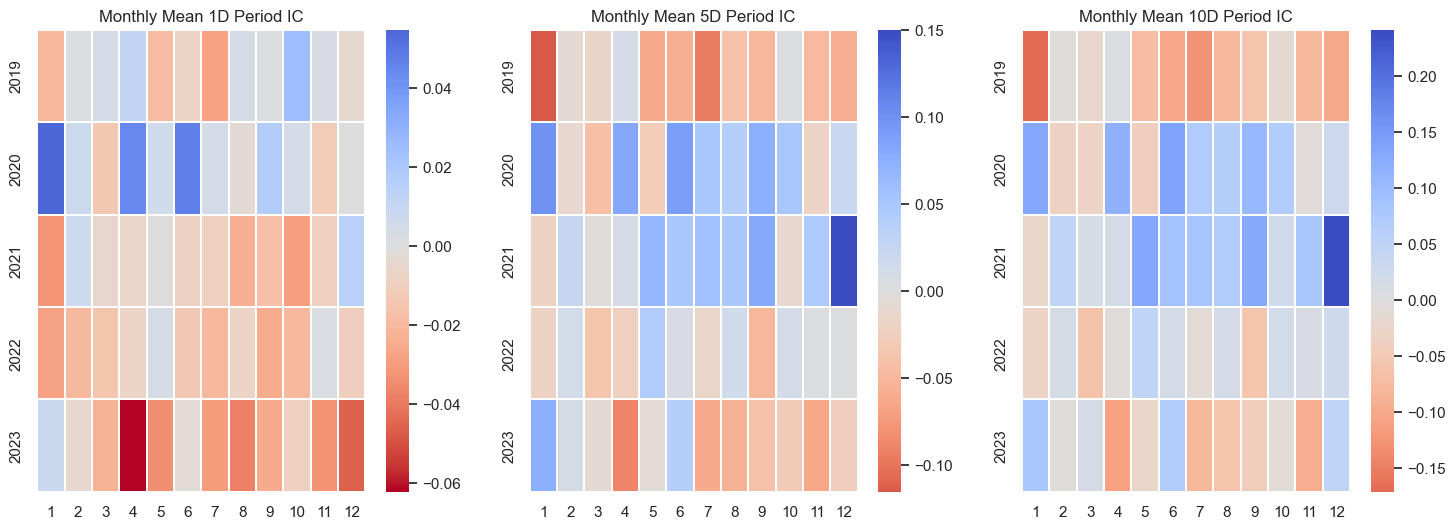

 50%|████████████████████████████████████████████████████████████████████████████▌                                                                            | 1/2 [00:12<00:12, 12.71s/it]

Factor pe
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
IC plots:


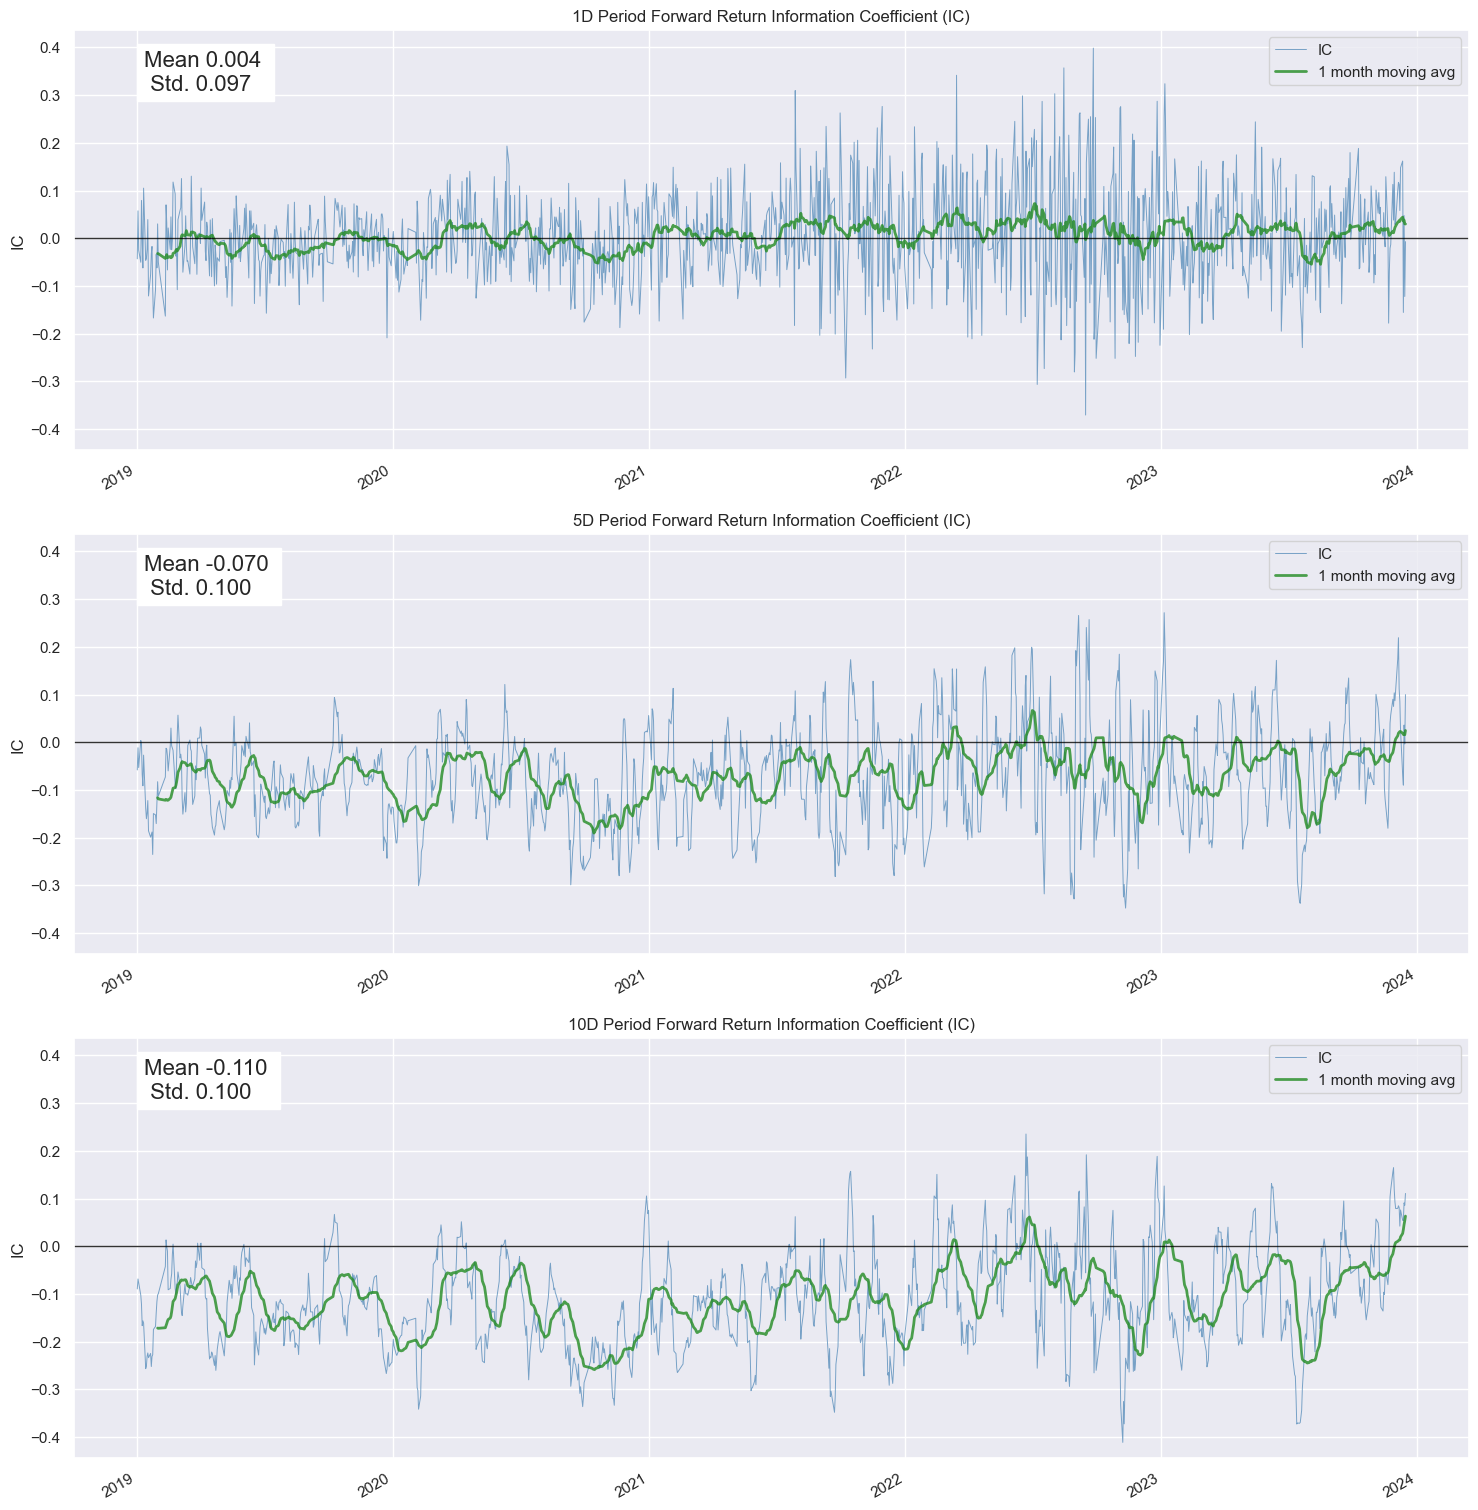

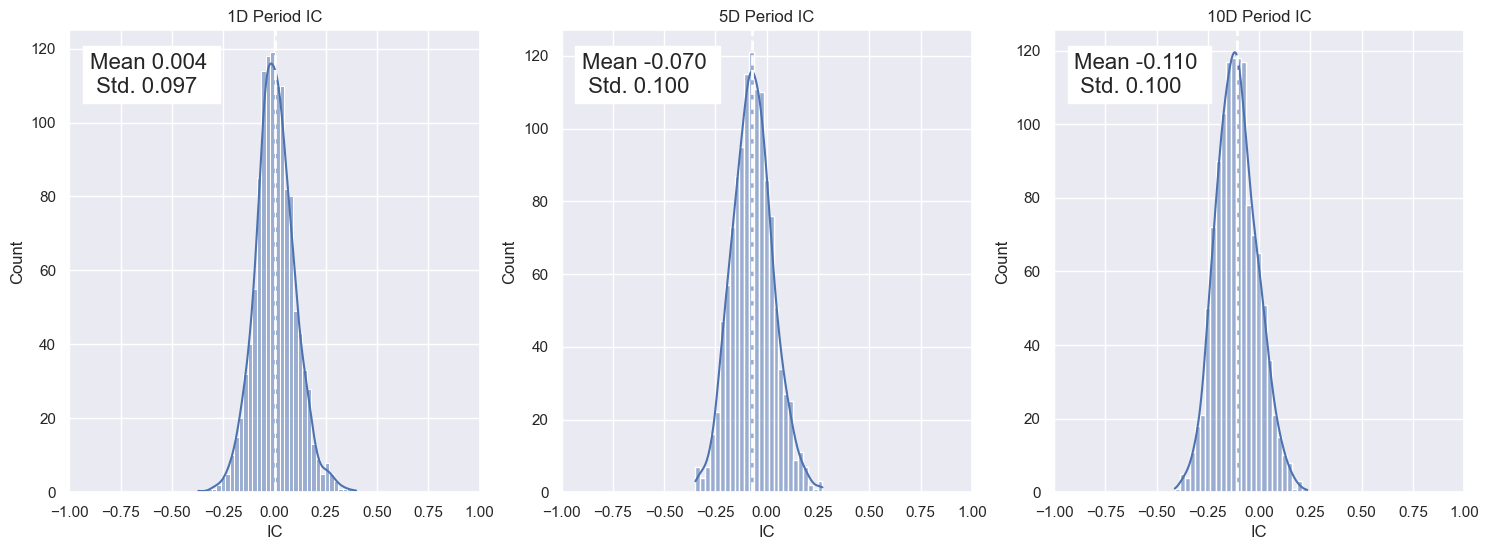

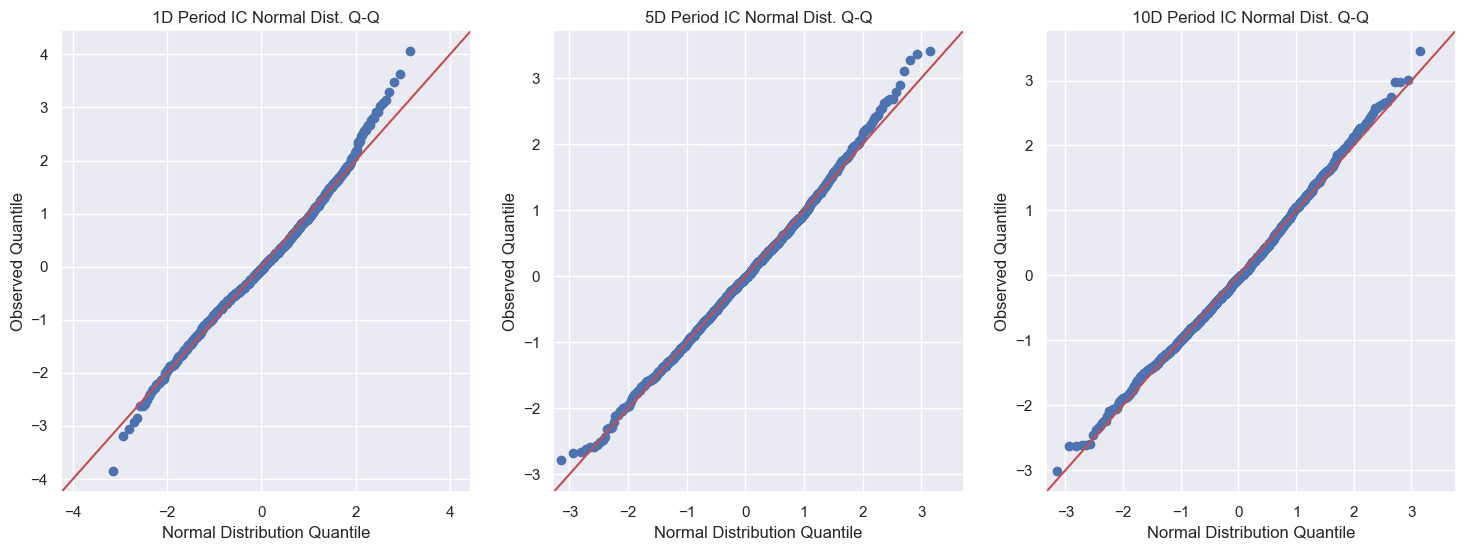

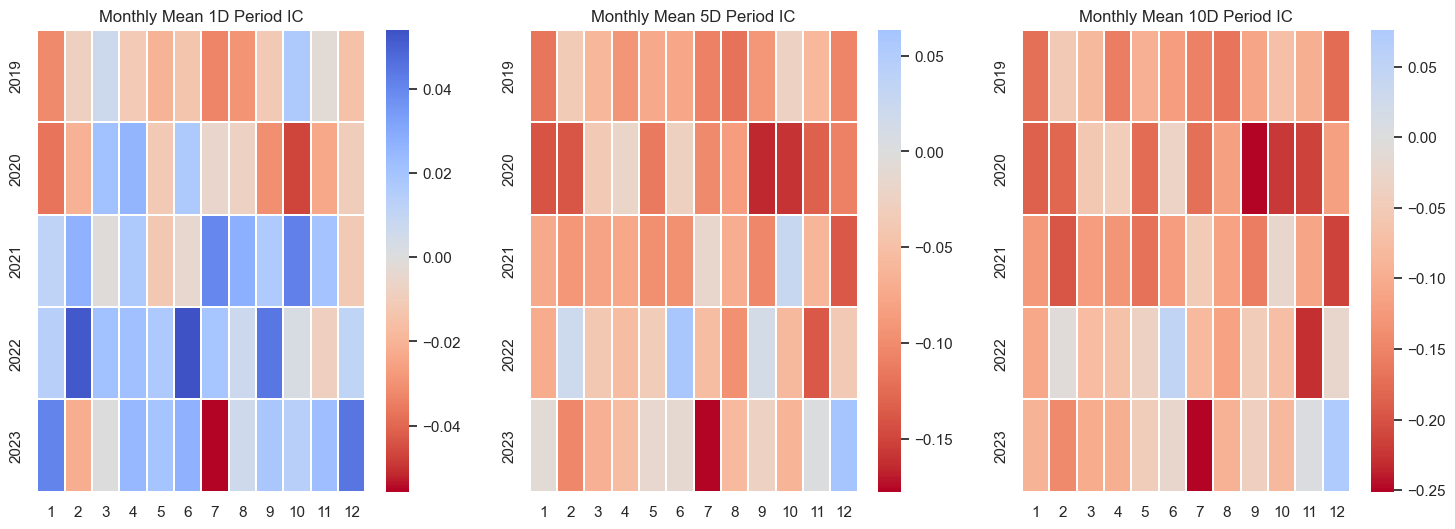

----------------------------------------------------------------------------------------------------
Rank IC plots:


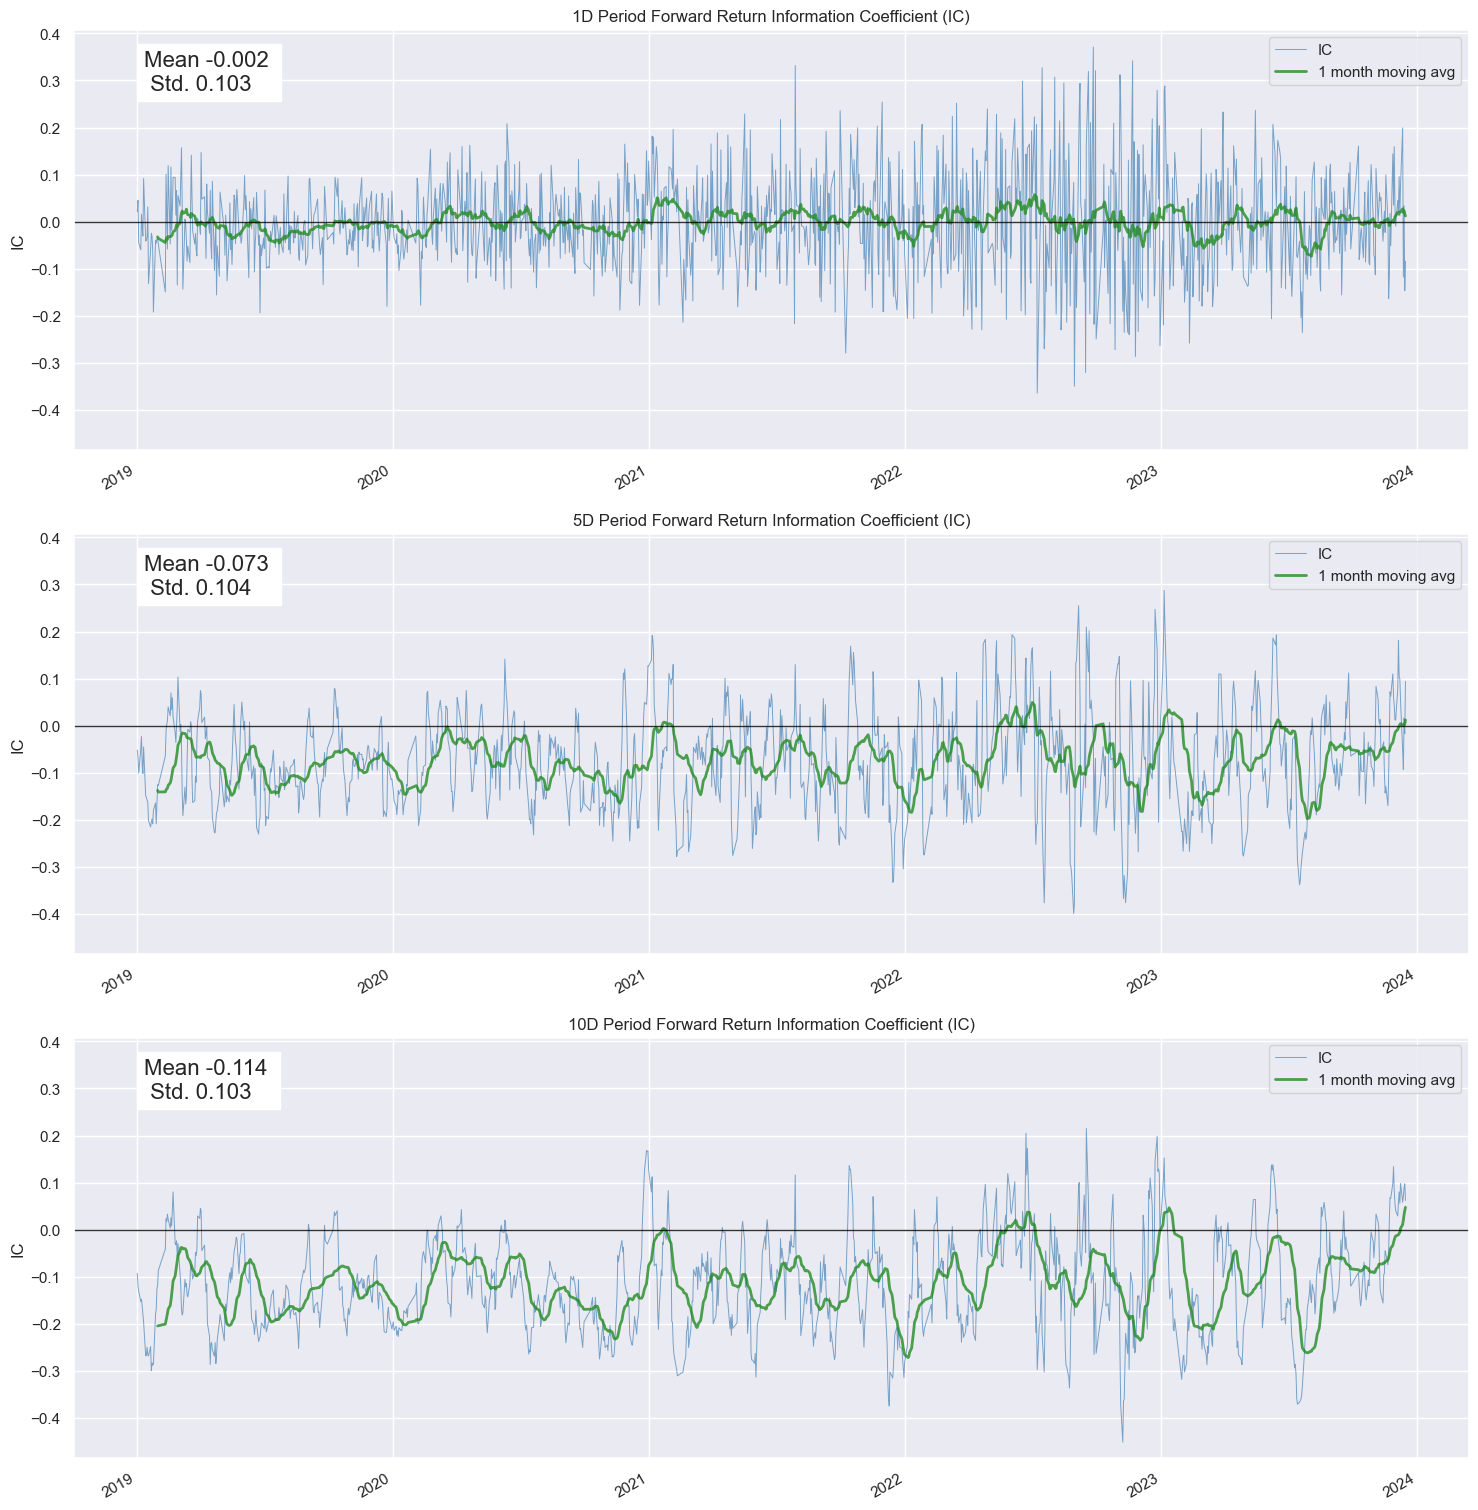

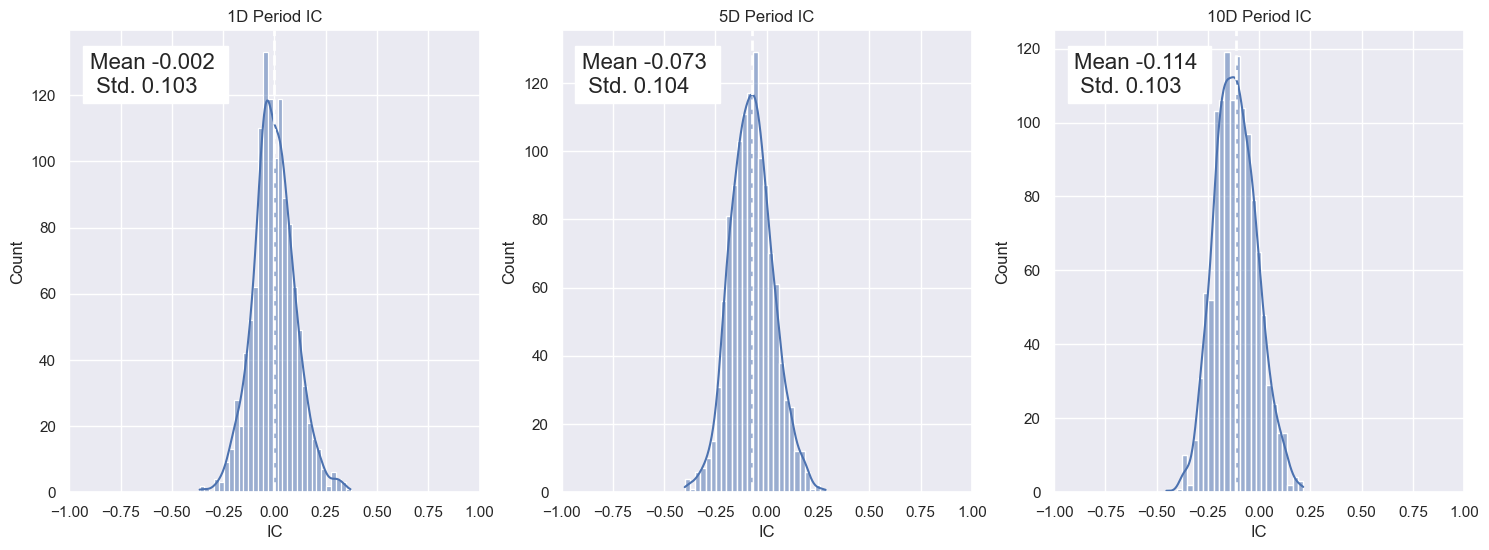

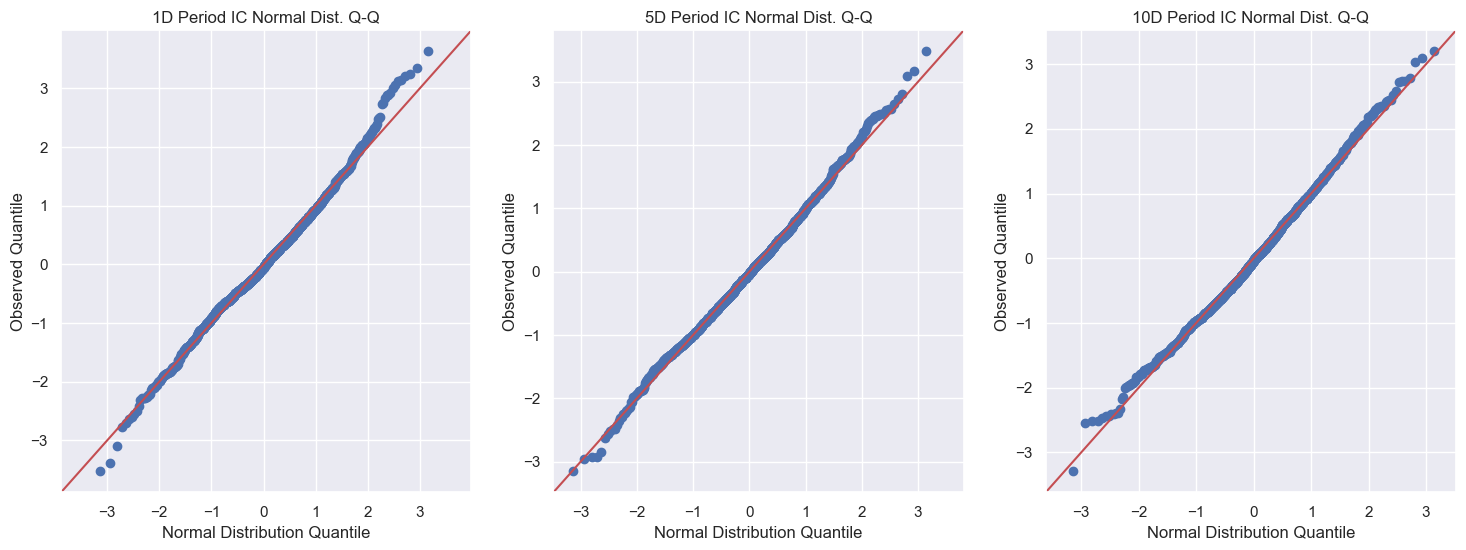

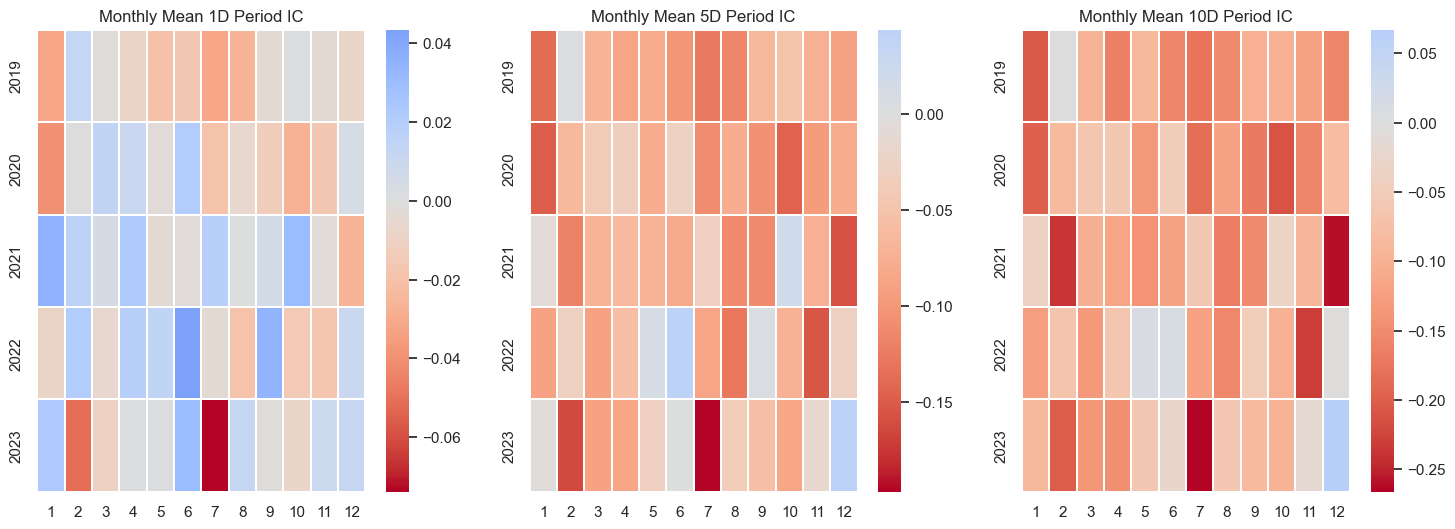

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:25<00:00, 12.79s/it]

In [8]:
all_ic_df, all_ic_r_df, all_ir_df, all_ir_r_df = factor_analysis_all(ohlcv, factors.iloc[:, :2], if_plot=True)

In [8]:
all_ic_df, all_ic_r_df, all_ir_df, all_ir_r_df = factor_analysis_all(ohlcv, factors, if_plot=False)

  0%|                                                                                                                                                                | 0/20 [00:00<?, ?it/s]

Factor total_mv
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


  5%|███████▌                                                                                                                                                | 1/20 [00:06<02:12,  6.96s/it]

Factor pe
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 10%|███████████████▏                                                                                                                                        | 2/20 [00:14<02:07,  7.06s/it]

Factor pb
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 15%|██████████████████████▊                                                                                                                                 | 3/20 [00:21<02:01,  7.17s/it]

Factor turnover_rate
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 20%|██████████████████████████████▍                                                                                                                         | 4/20 [00:28<01:56,  7.31s/it]

Factor reversal_rate
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 25%|██████████████████████████████████████                                                                                                                  | 5/20 [00:35<01:47,  7.20s/it]

Factor volatility
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 30%|█████████████████████████████████████████████▌                                                                                                          | 6/20 [00:42<01:40,  7.15s/it]

Factor roe
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 35%|█████████████████████████████████████████████████████▏                                                                                                  | 7/20 [00:49<01:32,  7.09s/it]

Factor netprofit_yoy
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 40%|████████████████████████████████████████████████████████████▊                                                                                           | 8/20 [00:56<01:24,  7.08s/it]

Factor or_yoy
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 45%|████████████████████████████████████████████████████████████████████▍                                                                                   | 9/20 [01:04<01:19,  7.20s/it]

Factor assets_yoy
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 50%|███████████████████████████████████████████████████████████████████████████▌                                                                           | 10/20 [01:11<01:11,  7.20s/it]

Factor equity_yoy
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 55%|███████████████████████████████████████████████████████████████████████████████████                                                                    | 11/20 [01:18<01:03,  7.11s/it]

Factor gross_profit_margin
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 60%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 12/20 [01:25<00:56,  7.10s/it]

Factor operating_profit_margin
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 13/20 [01:32<00:49,  7.04s/it]

Factor net_profit_margin
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 14/20 [01:39<00:42,  7.04s/it]

Factor operating_cash_flow_to_net_income
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 15/20 [01:46<00:35,  7.00s/it]

Factor operating_cash_flow_to_revenue
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 16/20 [01:53<00:28,  7.02s/it]

Factor current_ratio
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 17/20 [02:00<00:20,  6.99s/it]

Factor cash_current_liability_ratio
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 18/20 [02:07<00:13,  6.96s/it]

Factor cash_liability_ratio
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 19/20 [02:14<00:06,  7.00s/it]

Factor long_term_liability_operating_cash_flow_ratio
Dropped 0.9% entries from factor data: 0.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:21<00:00,  7.07s/it]

In [9]:
all_ic_df

total_mv        pe        pb  turnover_rate  reversal_rate  \
date                                                                         
2019-01-02 1D  -0.047945 -0.043154 -0.041048      -0.008485      -0.040458   
           5D  -0.062175 -0.058090 -0.013413      -0.052216      -0.065501   
           10D -0.081810 -0.089485 -0.026193      -0.084015      -0.097253   
2019-01-03 1D   0.092075  0.057372  0.050777       0.091680       0.067536   
           5D  -0.009767 -0.011544  0.020783      -0.008999      -0.013404   
...                  ...       ...       ...            ...            ...   
2023-12-14 5D   0.071037 -0.003622 -0.044051       0.021170      -0.002847   
           10D  0.169791  0.085813  0.094535       0.029361       0.009645   
2023-12-15 1D   0.085897 -0.007123 -0.047353       0.006965      -0.018124   
           5D   0.179781  0.099776  0.075193       0.062495       0.040601   
           10D  0.288926  0.110607  0.194480      -0.030212      -0.054786   

                volatility       roe  netprofit_yoy    or_yoy  assets_yoy  \
date                                                                        
2019-01-02 1D    -0.023262 -0.027951      -0.022712 -0.011272   -0.010283   
           5D    -0.063962 -0.043823      -0.049909 -0.050418   -0.028556   
           10D   -0.093462 -0.082259      -0.081125 -0.083741   -0.059838   
2019-01-03 1D     0.093442  0.102561       0.077331  0.078487    0.115520   
           5D    -0.014217  0.000287      -0.006308 -0.017252    0.018665   
...                    ...       ...            ...       ...         ...   
2023-12-14 5D     0.005576  0.010685       0.010765  0.008807    0.015802   
           10D    0.049207 -0.032532       0.053015  0.041933   -0.001213   
2023-12-15 1D    -0.001112  0.001060       0.006571  0.016008    0.014042   
           5D     0.068958  0.023598       0.071382  0.067964    0.052658   
           10D    0.028003 -0.117058       0.026770  0.016393   -0.063524   

                equity_yoy  gross_profit_margin  operating_profit_margin  \
date                                                                       
2019-01-02 1D    -0.012357            -0.050179                -0.039921   
           5D    -0.059787            -0.063153                -0.067578   
           10D   -0.086162            -0.088393                -0.090368   
2019-01-03 1D     0.082189             0.091281                 0.099300   
           5D    -0.032925            -0.022038                -0.030073   
...                    ...                  ...                      ...   
2023-12-14 5D    -0.000268             0.009792                 0.014261   
           10D    0.008299            -0.032445                -0.029226   
2023-12-15 1D    -0.015270             0.024064                 0.027418   
           5D     0.053130             0.018869                 0.021055   
           10D   -0.030226            -0.113290                -0.104968   

                net_profit_margin  operating_cash_flow_to_net_income  \
date                                                                   
2019-01-02 1D           -0.045227                          -0.022656   
           5D           -0.058085                          -0.068896   
           10D          -0.085222                          -0.105177   
2019-01-03 1D            0.090142                           0.076344   
           5D           -0.024448                          -0.016533   
...                           ...                                ...   
2023-12-14 5D            0.012314                           0.001860   
           10D          -0.033810                          -0.000691   
2023-12-15 1D            0.032619                          -0.009262   
           5D            0.020464                           0.043243   
           10D          -0.111007                          -0.063326   

                operating_cash_flow_to_revenue  current_ratio  \
date    

In [10]:
all_ic_r_df

total_mv        pe        pb  turnover_rate  reversal_rate  \
date                                                                         
2019-01-02 1D   0.019939  0.021016  0.012268       0.046935       0.014476   
           5D  -0.050999 -0.051969 -0.007556      -0.034907      -0.053832   
           10D -0.089630 -0.093121 -0.026777      -0.081149      -0.099216   
2019-01-03 1D   0.089360  0.045220  0.013130       0.091311       0.067149   
           5D  -0.071231 -0.068193 -0.009723      -0.066720      -0.072778   
...                  ...       ...       ...            ...            ...   
2023-12-14 5D  -0.007845 -0.017495 -0.068462       0.026053       0.025267   
           10D  0.143802  0.097351  0.097568       0.072731       0.077464   
2023-12-15 1D  -0.036593 -0.084130 -0.106131      -0.035428      -0.062749   
           5D   0.143829  0.093985  0.068823       0.091812       0.093415   
           10D  0.236889  0.061854  0.133011      -0.026435      -0.028959   

                volatility       roe  netprofit_yoy    or_yoy  assets_yoy  \
date                                                                        
2019-01-02 1D     0.029690  0.017033       0.035387  0.052559    0.059553   
           5D    -0.059260 -0.029646      -0.042442 -0.039935   -0.005665   
           10D   -0.102871 -0.079297      -0.078100 -0.087101   -0.051777   
2019-01-03 1D     0.096786  0.113719       0.081352  0.086734    0.122565   
           5D    -0.088088 -0.038323      -0.064244 -0.074437   -0.035058   
...                    ...       ...            ...       ...         ...   
2023-12-14 5D     0.009678  0.038404       0.028612  0.030376    0.019154   
           10D    0.086666  0.030836       0.100016  0.096154    0.051936   
2023-12-15 1D    -0.052336 -0.027934      -0.044374 -0.033124   -0.037193   
           5D     0.102991  0.064353       0.107618  0.109650    0.074114   
           10D    0.017176 -0.094700       0.029164  0.021238   -0.055418   

                equity_yoy  gross_profit_margin  operating_profit_margin  \
date                                                                       
2019-01-02 1D     0.031556            -0.007296                 0.001567   
           5D    -0.042422            -0.053974                -0.055644   
           10D   -0.076211            -0.092043                -0.092160   
2019-01-03 1D     0.100446             0.107807                 0.113024   
           5D    -0.064710            -0.062698                -0.067866   
...                    ...                  ...                      ...   
2023-12-14 5D     0.007446             0.029658                 0.033806   
           10D    0.048906             0.025632                 0.026159   
2023-12-15 1D    -0.056082            -0.023445                -0.017326   
           5D     0.069976             0.050937                 0.054204   
           10D   -0.031473            -0.090123                -0.091205   

                net_profit_margin  operating_cash_flow_to_net_income  \
date                                                                   
2019-01-02 1D           -0.000751                           0.028984   
           5D           -0.044531                          -0.058800   
           10D          -0.089658                          -0.103541   
2019-01-03 1D            0.107585                           0.085009   
           5D           -0.062321                          -0.076822   
...                           ...                                ...   
2023-12-14 5D            0.027988                           0.027943   
           10D           0.018079                           0.065804   
2023-12-15 1D           -0.021064                          -0.057370   
           5D            0.046263                           0.093161   
           10D          -0.101545                          -0.040616   

                operating_cash_flow_to_revenue  current_ratio  \
date    

In [11]:
all_ir_df

,total_mv,pe,pb,turnover_rate,reversal_rate,volatility,roe,netprofit_yoy,or_yoy,assets_yoy,equity_yoy,gross_profit_margin,operating_profit_margin,net_profit_margin,operating_cash_flow_to_net_income,operating_cash_flow_to_revenue,current_ratio,cash_current_liability_ratio,cash_liability_ratio,long_term_liability_operating_cash_flow_ratio
1D,-0.111572,0.041485,-0.083007,-0.004058,0.028508,0.072460,0.143287,0.101883,0.120422,0.143840,0.185500,0.166295,0.167481,0.168330,0.123611,0.125881,0.166546,0.125935,0.127474,0.122412
5D,0.137547,-0.698019,-0.696450,-0.581259,-0.534731,-0.618491,-0.554651,-0.702283,-0.682199,-0.562597,-0.638216,-0.616976,-0.615457,-0.619036,-0.553217,-0.564518,-0.569543,-0.552780,-0.552232,-0.522830
10D,0.180128,-1.097679,-1.026605,-0.902388,-0.851985,-0.993900,-0.885749,-1.132162,-1.088939,-0.895472,-1.042193,-1.020061,-1.019013,-1.021658,-0.900736,-0.927850,-0.931588,-0.906110,-0.903864,-0.860137


In [12]:
all_ir_r_df

,total_mv,pe,pb,turnover_rate,reversal_rate,volatility,roe,netprofit_yoy,or_yoy,assets_yoy,equity_yoy,gross_profit_margin,operating_profit_margin,net_profit_margin,operating_cash_flow_to_net_income,operating_cash_flow_to_revenue,current_ratio,cash_current_liability_ratio,cash_liability_ratio,long_term_liability_operating_cash_flow_ratio
1D,-0.098914,-0.020960,-0.057655,-0.041989,-0.052856,0.066940,0.069158,0.032534,0.047954,0.067303,0.096090,0.078546,0.079003,0.081888,0.053040,0.053350,0.094842,0.053742,0.054510,0.050245
5D,0.002752,-0.708345,-0.545784,-0.554949,-0.549747,-0.558793,-0.559389,-0.687197,-0.653267,-0.564312,-0.666291,-0.666348,-0.664960,-0.663441,-0.561006,-0.569221,-0.599698,-0.546499,-0.547819,-0.542534
10D,0.061876,-1.105376,-0.841014,-0.857030,-0.848004,-0.911795,-0.887485,-1.068606,-1.010577,-0.890130,-1.051145,-1.062352,-1.060869,-1.055849,-0.894570,-0.908802,-0.952502,-0.875751,-0.875592,-0.868137
